In [1]:
from IPython.display import Image

# <a href="https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html">`TORCH.AUTOGRAD`를 사용한 자동 미분</a>

신경망을 학습할 때 가장 자주 사용되는 알고리즘은 **역전파**입니다. 이 알고리즘에서, 매개변수(모델 가중치)는 주어진 매개변수에 대한 손실 함수의 **변화도(gradient)** 에 따라 조정됩니다.

이러한 변화도를 계산하기 위해 PyTorch에는 `torch.autograd` 라고 불리는 자동 미분 엔진이 내장되어 있습니다. 이는 모든 계산 그래프에 대한 변화도의 자동 계산을 지원합니다.

입력 `x`, 매개변수 `w`와 `b`, 그리고 일부 손실 함수가 있는 가장 간단한 단일 계층 신경망을 가정하겠습니다.

In [2]:
# 라이브러리 불러오기
import torch

In [12]:
x = torch.ones(5)
y = torch.zeros(3)

w = torch.randn(5, 3, requires_grad = True)
b = torch.randn(3, requires_grad = True)

z = torch.matmul(x, w) + b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Tensor, Function과 연산그래프(Computational graph)

이 코드는 다음의 **연산 그래프** 를 정의합니다.

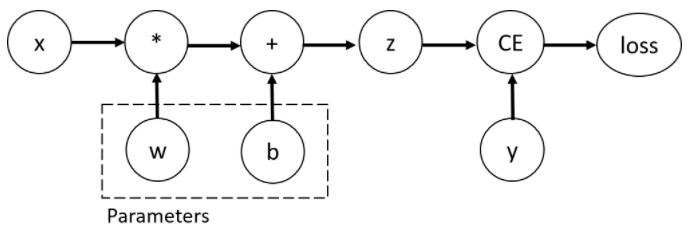

In [13]:
Image("./Images/Autograd.png")

이 신경망에서, `w`와 `b`는 최적화를 해야 하는 **매개변수**이다.

따라서 이러한 변수들에 대한 손실 함수의 변화도를 계산할 수 있어야 한다.

이를 위해서 해당 텐서에 `requires_grad` 속성을 설정한다.

- `requires_grad`의 값은 텐서를 생성할 때 설정하거나, 나중에 `x.requires_grad_(True)` 메소드를 사용하여 나중에 설정할 수 있다.

연산 그래프를 구성하기 위해 텐서에 적용하는 함수는 사실 `Function` 클래스의 객체이다.

이 객체는 순전파방향으로 함수를 계산하는 방법과, 역방향전파 단계에서 도함수(derivative)를 계산하는 방법을 알고 있다.

역방향 전파 함수에 대한 참조(reference)는 텐서의 `grad_fn` 속성에 저장된다.

`Function`에 대한 자세한 정보는 [여기서](https://pytorch.org/docs/stable/autograd.html#function) 찾아볼 수 있다.

In [30]:
print("Gradient function for z =", z.grad_fn, "\n")
print("Gradient funtion for loss =", loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7fd461e9a820> 

Gradient funtion for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fd461e9a460>


## 변화도(Gradient) 계산하기

신경망에서 매개변수의 가중치를 최적화하려면 매개변수에 대한 손실함수의 도함수(derivative)를 계산해야 한다.

즉, `x`와 `y`의 일부 고정값에서 $\frac{\partial loss}{\partial w}$ 와 $\frac{\partial loss}{\partial b}$ 가 필요하다.

이러한 도함수를 계산하기 위해, `loss.backward()`를 호출한 다음 `w.grad`와 `b.grad`에서 값을 가져온다.

In [33]:
loss.backward()

print(w.grad, "\n")
print(b.grad)

tensor([[0.0380, 0.2439, 0.3110],
        [0.0380, 0.2439, 0.3110],
        [0.0380, 0.2439, 0.3110],
        [0.0380, 0.2439, 0.3110],
        [0.0380, 0.2439, 0.3110]]) 

tensor([0.0380, 0.2439, 0.3110])
